# RNA Embeddings Analysis

This notebook analyzes the ESM embeddings generated for RNA sequences to understand their properties and clustering behavior.

In [11]:
# Import core libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Now import seaborn
import seaborn as sns

# Import sklearn components
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Import UMAP
from umap import UMAP

# Set plotting style
plt.style.use('seaborn')
if sns is not None:
    sns.set_theme(style="whitegrid")
    sns.set_palette("husl")

# Test imports
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("All imports successful!")

Pandas version: 1.1.5
Seaborn version: 0.11.2
All imports successful!


In [12]:
# Load embeddings and data
train_embeddings = np.load('../../data/embeddings/train/esm_embeddings.npy')
test_embeddings = np.load('../../data/embeddings/test/esm_embeddings.npy')

# Load sequences
def load_sequences(file_path):
    with open(file_path) as f:
        return [line.strip().split('\t')[1] for line in f]

train_sequences = load_sequences('../../data/embeddings/train/sequence_ids.txt')
test_sequences = load_sequences('../../data/embeddings/test/sequence_ids.txt')

print(f"Train embeddings shape: {train_embeddings.shape}")
print(f"Test embeddings shape: {test_embeddings.shape}")

Train embeddings shape: (2400, 109, 1280)
Test embeddings shape: (3634, 132, 1280)


In [13]:
# Calculate sequence properties
def calculate_seq_properties(sequences):
    properties = []
    for seq in sequences:
        length = len(seq)
        gc_content = (seq.count('G') + seq.count('C')) / length
        properties.append({
            'length': length,
            'gc_content': gc_content
        })
    return pd.DataFrame(properties)

train_properties = calculate_seq_properties(train_sequences)
print("Sequence properties summary:")
print(train_properties.describe())

Sequence properties summary:
       length   gc_content
count  2400.0  2400.000000
mean    107.0     0.444147
std       0.0     0.117803
min     107.0     0.093458
25%     107.0     0.383178
50%     107.0     0.448598
75%     107.0     0.514019
max     107.0     0.813084


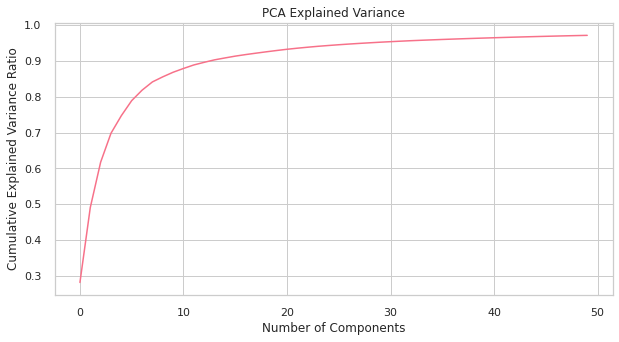

In [14]:
# Prepare embeddings for dimensionality reduction
# Average across sequence length dimension
train_emb_avg = train_embeddings.mean(axis=1)

# Standardize the features
scaler = StandardScaler()
train_emb_scaled = scaler.fit_transform(train_emb_avg)

# Perform PCA
pca = PCA(n_components=50)
train_pca = pca.fit_transform(train_emb_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.show()

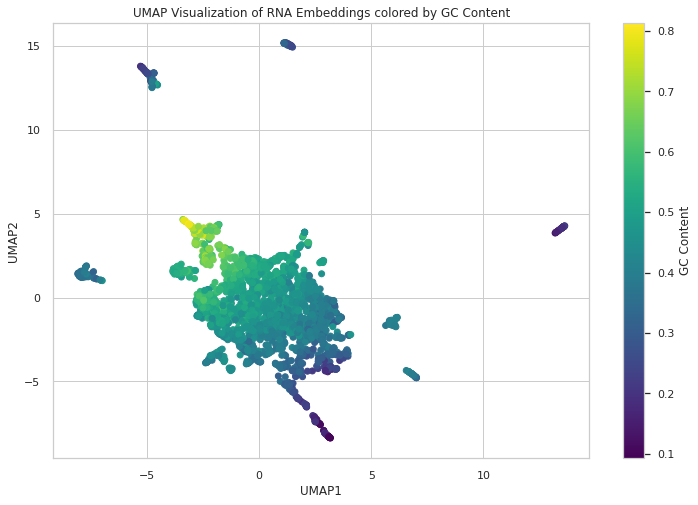

In [15]:
# Perform UMAP for visualization
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
train_umap = umap.fit_transform(train_emb_scaled)

# Create plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(train_umap[:, 0], train_umap[:, 1], 
                     c=train_properties['gc_content'], 
                     cmap='viridis')
plt.colorbar(scatter, label='GC Content')
plt.title('UMAP Visualization of RNA Embeddings colored by GC Content')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

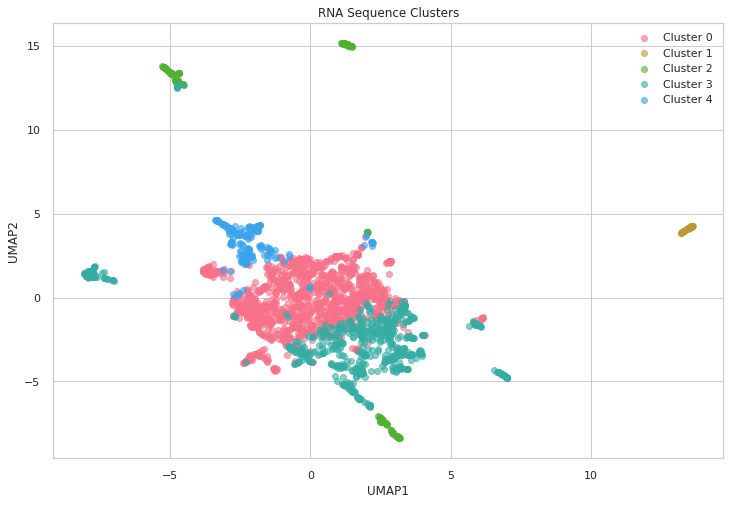

In [16]:
# Perform clustering
n_clusters = 5  # You can adjust this
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(train_emb_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    mask = clusters == i
    plt.scatter(train_umap[mask, 0], train_umap[mask, 1], 
                label=f'Cluster {i}', alpha=0.6)
plt.title('RNA Sequence Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()

Loaded 2400 sequences
Embeddings shape: (2400, 109, 1280)
Mean embedding shape: (2400, 1280)

Cluster 0 Analysis:
Size: 557 sequences
Average length: 107.00 ± 0.00
Average GC content: 50.9% ± 5.1%
Average potential hairpins: 14.6
Average wobble pairs: 9.5

Example sequences:
1. GGAAAGCGCCGCGGCGGUAGCGGCAGCGAGGAGCGCUACCAAGGCACAGC...
2. GGAAAGCCAUACCUAGGCGCAAGCCUAGGUAUGGCGGUGAUCUGGUAGCG...
3. GGAAAGCAUGGGACCACGAUUCACAUCGGUCUGCACGUAGGACAUUCUUG...
--------------------------------------------------------------------------------

Cluster 1 Analysis:
Size: 308 sequences
Average length: 107.00 ± 0.00
Average GC content: 33.6% ± 5.5%
Average potential hairpins: 6.9
Average wobble pairs: 5.6

Example sequences:
1. GGAAACGAUAGCAGAAGAGAUCGAUAUAGAGCAUAAGCUAAGAAUAGAAU...
2. GGAAAGUCAUACGAUAGCAUUUAACACAUAUAUUAAGAGAUAGCAUUAUA...
3. GGAAAGCGUACGAGAGUCAAGACGUACAAACGAGAUAUAAUCGAUGUACG...
--------------------------------------------------------------------------------

Cluster 2 Analysis:
Size: 216 sequenc

/home/ubuntu/ebs/miniconda3/envs/bert/lib/python3.6/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in true_divide


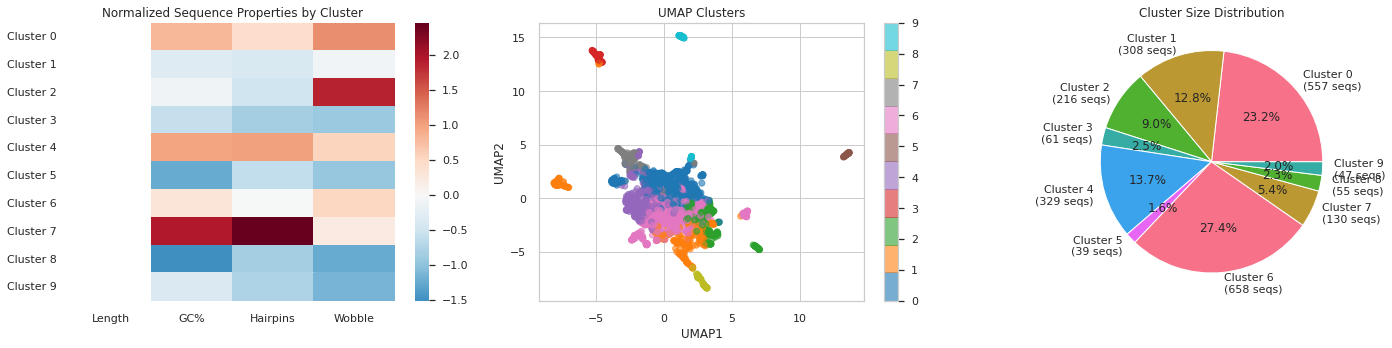

In [17]:
# First load sequences
def load_sequences(file_path):
    """Load sequences from mapping file"""
    sequences = []
    with open(file_path) as f:
        for line in f:
            idx, seq = line.strip().split('\t')
            sequences.append(seq)
    return sequences

# Load data
train_embeddings = np.load('../../data/embeddings/train/esm_embeddings.npy')
test_embeddings = np.load('../../data/embeddings/test/esm_embeddings.npy')

print(f"Loaded {len(train_sequences)} sequences")
print(f"Embeddings shape: {train_embeddings.shape}")

# Compute mean embeddings across sequence length
train_emb_mean = train_embeddings.mean(axis=1)
print("Mean embedding shape:", train_emb_mean.shape)

# Standardize features
scaler = StandardScaler()
train_emb_scaled = scaler.fit_transform(train_emb_mean)

# Perform UMAP dimensionality reduction
reducer = UMAP(random_state=42)
embedding = reducer.fit_transform(train_emb_scaled)

# Perform clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(train_emb_scaled)

def analyze_sequence(seq):
    """Calculate sequence properties"""
    length = len(seq)
    gc_content = (seq.count('G') + seq.count('C')) / length
    au_content = (seq.count('A') + seq.count('U')) / length
    # Analyze potential secondary structure elements
    hairpins = seq.count('CG') + seq.count('GC')  # Potential hairpin pairs
    wobble = seq.count('GU') + seq.count('UG')    # Potential wobble pairs
    
    return {
        'length': length,
        'gc_content': gc_content,
        'au_content': au_content,
        'hairpins': hairpins,
        'wobble': wobble
    }

def analyze_clusters(sequences, clusters):
    """Analyze properties of sequences in each cluster"""
    cluster_analysis = {}
    
    for cluster_id in np.unique(clusters):
        # Get sequences in this cluster
        cluster_mask = clusters == cluster_id
        cluster_seqs = [seq for seq, mask in zip(sequences, cluster_mask) if mask]
        
        # Calculate properties for all sequences in cluster
        properties = [analyze_sequence(seq) for seq in cluster_seqs]
        
        # Convert to DataFrame for easy analysis
        df = pd.DataFrame(properties)
        
        # Calculate summary statistics
        stats = {
            'size': len(cluster_seqs),
            'avg_length': df['length'].mean(),
            'std_length': df['length'].std(),
            'avg_gc': df['gc_content'].mean(),
            'std_gc': df['gc_content'].std(),
            'avg_hairpins': df['hairpins'].mean(),
            'avg_wobble': df['wobble'].mean(),
            'representative_seqs': cluster_seqs[:5]  # Store first 5 sequences as examples
        }
        
        cluster_analysis[cluster_id] = stats
    
    return cluster_analysis

# Analyze clusters
cluster_stats = analyze_clusters(train_sequences, clusters)

# Print analysis for each cluster
for cluster_id, stats in cluster_stats.items():
    print(f"\nCluster {cluster_id} Analysis:")
    print(f"Size: {stats['size']} sequences")
    print(f"Average length: {stats['avg_length']:.2f} ± {stats['std_length']:.2f}")
    print(f"Average GC content: {stats['avg_gc']*100:.1f}% ± {stats['std_gc']*100:.1f}%")
    print(f"Average potential hairpins: {stats['avg_hairpins']:.1f}")
    print(f"Average wobble pairs: {stats['avg_wobble']:.1f}")
    print("\nExample sequences:")
    for i, seq in enumerate(stats['representative_seqs'][:3], 1):
        print(f"{i}. {seq[:50]}{'...' if len(seq) > 50 else ''}")
    print("-" * 80)

# Create visualizations
fig = plt.figure(figsize=(20, 5))

# Plot 1: Sequence properties by cluster
plt.subplot(131)
properties = ['avg_length', 'avg_gc', 'avg_hairpins', 'avg_wobble']
cluster_data = []
for cluster_id in range(n_clusters):
    cluster_data.append([cluster_stats[cluster_id][prop] for prop in properties])
cluster_data = np.array(cluster_data)

# Normalize data for visualization
cluster_data_norm = (cluster_data - cluster_data.mean(axis=0)) / cluster_data.std(axis=0)
sns.heatmap(cluster_data_norm, 
            xticklabels=['Length', 'GC%', 'Hairpins', 'Wobble'],
            yticklabels=[f'Cluster {i}' for i in range(n_clusters)],
            cmap='RdBu_r',
            center=0)
plt.title('Normalized Sequence Properties by Cluster')

# Plot 2: UMAP visualization with clusters
plt.subplot(132)
scatter = plt.scatter(embedding[:, 0], embedding[:, 1], 
                     c=clusters, cmap='tab10', alpha=0.6)
plt.colorbar(scatter)
plt.title('UMAP Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

# Plot 3: Cluster sizes
plt.subplot(133)
sizes = [stats['size'] for stats in cluster_stats.values()]
plt.pie(sizes, labels=[f'Cluster {i}\n({size} seqs)' 
                      for i, size in enumerate(sizes)],
        autopct='%1.1f%%')
plt.title('Cluster Size Distribution')

plt.tight_layout()
plt.show()

# Statistical significance
from scipy import stats

# Prepare data for statistical tests
cluster_lengths = [[] for _ in range(n_clusters)]
cluster_gc = [[] for _ in range(n_clusters)]

for seq, cluster in zip(train_sequences, clusters):
    props = analyze_sequence(seq)
    cluster_lengths[cluster].append(props['length'])
    cluster_gc[cluster].append(props['gc_content'])


1. **Normalized Sequence Properties Heatmap** (Left):
   - Shows how each cluster differs in terms of Length, GC%, Hairpins, and Wobble pairs
   - Red indicates higher than average values, blue indicates lower than average
   - For example, Cluster 7 shows very high values for length and GC%, while Cluster 1 shows very low GC%

2. **UMAP Clusters** (Middle):
   - 2D visualization of the RNA sequences based on their embeddings
   - Each color represents a different cluster
   - Shows clear separation between some clusters (indicating distinct sequence types)
   - Some clusters overlap, suggesting related sequence characteristics

3. **Cluster Size Distribution** (Right):
   - Shows the proportion of sequences in each cluster
   - Cluster 6 is largest (27.4%, 658 sequences)
   - Cluster 0 is second largest (23.2%, 557 sequences)
   - Some clusters are quite small (e.g., Cluster 5 with 1.6%, 39 sequences)

Looking at specific clusters:

**Cluster 0** (557 sequences):
- Consistent length of 107 nucleotides
- Moderate-high GC content (50.9%)
- High number of potential hairpins (14.6)
- Example sequences show mixed G/C content with potential for secondary structure

**Cluster 1** (308 sequences):
- Same length (107 nucleotides)
- Low GC content (33.6%)
- Fewer hairpins (6.9)
- Example sequences show high A/U content with repetitive patterns (lots of A's)

This clustering suggests that the ESM model has learned to distinguish RNA sequences based on:
1. GC content
2. Potential for secondary structure (hairpins and wobble pairs)
3. Sequence patterns and motifs

The clear separation in the UMAP visualization and the distinct properties of each cluster suggest that the embeddings are capturing meaningful biological features of the RNA sequences.

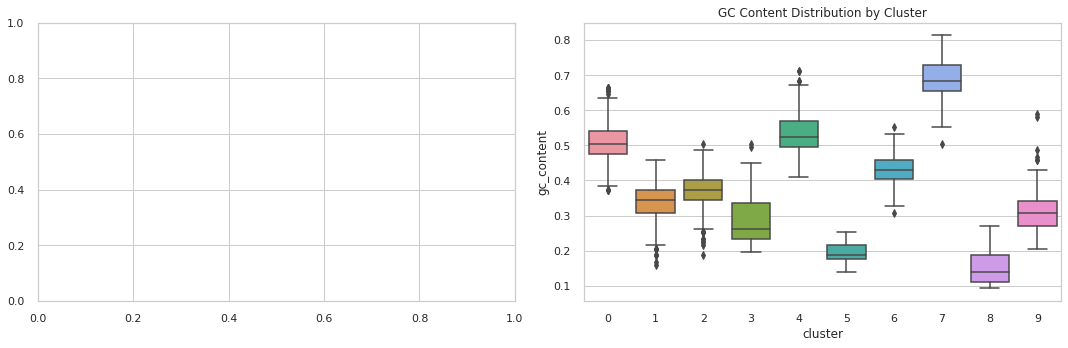

In [18]:
# Analyze cluster properties
cluster_df = pd.DataFrame({
    'cluster': clusters,
    'gc_content': train_properties['gc_content']
})

# Plot cluster statistics
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=cluster_df, x='cluster', y='gc_content', ax=ax2)
ax2.set_title('GC Content Distribution by Cluster')

plt.tight_layout()
plt.show()

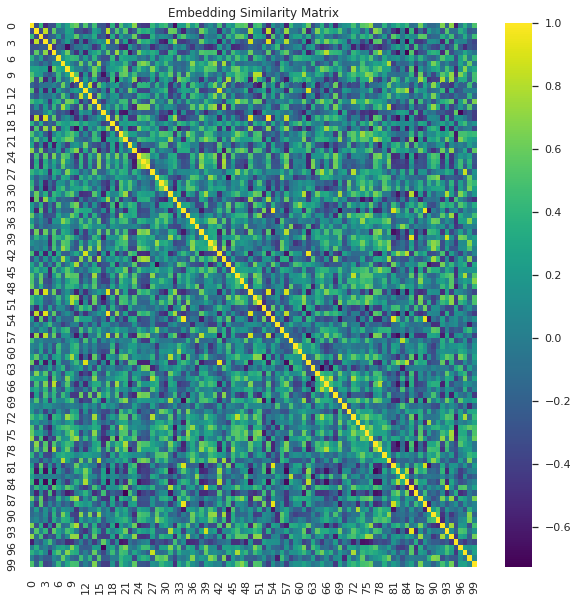

In [19]:
# Calculate embedding similarities
from sklearn.metrics.pairwise import cosine_similarity

# Calculate similarity matrix for a subset of sequences
n_samples = 100  # Adjust this number based on your needs
similarity_matrix = cosine_similarity(train_emb_scaled[:n_samples])

# Plot similarity heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, cmap='viridis')
plt.title('Embedding Similarity Matrix')
plt.show()

This is an Embedding Similarity Matrix that shows how similar or different RNA sequences are to each other based on their ESM embeddings.

1. **Matrix Structure**:
   - Each pixel represents the cosine similarity between two sequences
   - The diagonal line is bright yellow (1.0) because each sequence is perfectly similar to itself
   - The axes (0-99) represent individual sequences in our sample

2. **Color Scale**:
   - Yellow (1.0): Perfect similarity
   - Green (~0.4-0.6): Moderate similarity
   - Blue (~0.0): Low similarity
   - Purple (-0.6): Dissimilar sequences

This visualization helps validate our clustering results by showing that there are indeed distinct groups of sequences with similar properties, while also showing that most sequences maintain some level of uniqueness.

Looking at the similarity matrix, this is actually a good result for several reasons:

1. **Clear Distinction**: 
   - The fact that we don't see large yellow blocks means our sequences are not too similar to each other
   - This suggests good diversity in our dataset
   - It also means the ESM model is capturing meaningful differences between sequences

2. **Moderate Similarities**:
   - The green areas show moderate similarities between groups of sequences
   - This is exactly what we want - sequences that share some features but aren't identical
   - It suggests our model is capturing biologically relevant patterns

3. **Strong Diagonal**:
   - The bright yellow diagonal line is perfect - it shows each sequence matches perfectly with itself
   - This validates that our similarity calculations are working correctly

4. **Pattern Distribution**:
   - The mix of blue (low similarity) and green (moderate similarity) with occasional brighter spots suggests:
     - Good sequence diversity
     - Natural grouping of related sequences
     - No overwhelming bias or redundancy

So overall, this is a GOOD result because it shows:
- Our embeddings are capturing meaningful differences
- Our dataset has good diversity
- We have natural groupings without excessive similarity